In [1]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

Fer una selecció de les columnes/condicions que es volen estudiar:

In [2]:
counts= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/DataFrames/SSConditions_DataFrame.csv')

#Possar com a index la columna entre parentesi:
counts= counts.set_index('ensembl')

#Del dataFrame quedar-nos amb les columnes que comencen per ND i IGT:
counts= counts.filter(regex='^(ND|T2D)')
counts

,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T2D_counts.29,T2D_counts.30,T2D_counts.31,T2D_counts.32,T2D_counts.33,T2D_counts.34,T2D_counts.35,T2D_counts.36,T2D_counts.37,T2D_counts.38
ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,188,198,343,214,400,528,536,246,44,34,...,938,467,744,289,855,712,604,995,832,257
ENSG00000000005.5,0,0,0,0,21,0,0,0,0,0,...,0,4,8,0,0,5,0,0,0,2
ENSG00000000419.12,697,595,503,683,552,1609,1007,461,129,165,...,1410,1011,1170,1014,680,688,1329,671,730,593
ENSG00000000457.13,232,229,140,300,188,347,424,347,70,73,...,636,299,396,278,254,254,351,334,320,372
ENSG00000000460.16,119,85,27,101,46,35,125,105,22,34,...,120,60,135,80,30,48,77,68,51,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285498.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285505.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285508.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Del DataFrame filtrar les columnes que tinguin tots els valors 0 (no expressió), i dels ensmbl treure deci
counts1= counts[counts.sum(axis=1) > 0]

counts1.index = [col.split('.')[0] for col in counts1.index]
counts1

,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T2D_counts.29,T2D_counts.30,T2D_counts.31,T2D_counts.32,T2D_counts.33,T2D_counts.34,T2D_counts.35,T2D_counts.36,T2D_counts.37,T2D_counts.38
ENSG00000000003,188,198,343,214,400,528,536,246,44,34,...,938,467,744,289,855,712,604,995,832,257
ENSG00000000005,0,0,0,0,21,0,0,0,0,0,...,0,4,8,0,0,5,0,0,0,2
ENSG00000000419,697,595,503,683,552,1609,1007,461,129,165,...,1410,1011,1170,1014,680,688,1329,671,730,593
ENSG00000000457,232,229,140,300,188,347,424,347,70,73,...,636,299,396,278,254,254,351,334,320,372
ENSG00000000460,119,85,27,101,46,35,125,105,22,34,...,120,60,135,80,30,48,77,68,51,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483,0,0,0,0,0,0,6,0,0,0,...,1,0,0,0,0,0,0,1,0,0
ENSG00000285486,1,0,0,2,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,1,0
ENSG00000285492,0,5,0,5,0,4,4,10,1,0,...,0,3,1,1,0,2,0,0,2,12
ENSG00000285498,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Transposar DataFrame:
counts=counts1.T
counts

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285462,ENSG00000285467,ENSG00000285471,ENSG00000285473,ENSG00000285476,ENSG00000285483,ENSG00000285486,ENSG00000285492,ENSG00000285498,ENSG00000285509
ND_counts,188,0,697,232,119,18,29,612,318,298,...,0,5,0,0,69,0,1,0,0,2
ND_counts.1,198,0,595,229,85,1,121,468,226,180,...,0,3,0,0,30,0,0,5,0,0
ND_counts.2,343,0,503,140,27,26,472,556,317,246,...,0,6,0,0,13,0,0,0,0,0
ND_counts.3,214,0,683,300,101,8,23,582,402,402,...,0,10,0,0,64,0,2,5,0,8
ND_counts.4,400,21,552,188,46,0,42,383,196,323,...,0,2,0,0,19,0,0,0,0,17
ND_counts.5,528,0,1609,347,35,4,217,767,354,269,...,0,2,0,0,44,0,0,4,0,11
ND_counts.6,536,0,1007,424,125,10,301,570,341,329,...,0,8,0,0,41,6,0,4,0,5
ND_counts.7,246,0,461,347,105,1,3,431,173,199,...,1,5,0,1,112,0,17,10,0,0
ND_counts.8,44,0,129,70,22,1,2,149,62,70,...,0,3,0,0,8,0,0,1,1,0
ND_counts.9,34,0,165,73,34,2,7,151,106,69,...,0,1,0,0,19,0,0,0,0,2


# Preparar les dades per fer DEG:

Abans de fer l'estudi de DEG's s'han d'obtenir els components necessàris per aplicar pyDeseq2 i construïr l'AnnData: matriu dels recomptes i metadata.

In [6]:
#Definir les condicions, marcant el numero de files a les que correspon:
conditions = ['ND'] * 18 + ['T2D'] * 39 
# Crear un dataframe composat per el nom de les mostres i a quina condició patològica té:
metadata = pd.DataFrame(zip(counts.index, conditions), columns=['Sample', 'condition'])

#En el dataframe metadata establir la columna sample com index:
metadata=metadata.set_index('Sample')
#metadata

Creació de l'objecte AnnData amb el que treballarem:

In [7]:
from pydeseq2.dds import DeseqDataSet

# Creació de dds: objecte amb informació informació necessaria per fer DEG.
dds = DeseqDataSet(counts=counts,metadata=metadata,design_factors="condition")
dds

AnnData object with n_obs × n_vars = 57 × 49681
    obs: 'condition'
    obsm: 'design_matrix'

In [8]:
#Calcularà els valors estadístics (resultats) com: log2FoldChange, Pvalue, Pvalue asj (equival a qvalue)...
dds.deseq2()
dds

Fitting size factors...
... done in 0.17 seconds.

Fitting dispersions...
... done in 8.80 seconds.

Fitting dispersion trend curve...
... done in 1.32 seconds.

Fitting MAP dispersions...
... done in 9.71 seconds.

Fitting LFCs...
... done in 6.33 seconds.

Replacing 1088 outlier genes.

Fitting dispersions...
... done in 0.25 seconds.

Fitting MAP dispersions...
... done in 0.24 seconds.

Fitting LFCs...
... done in 0.21 seconds.



AnnData object with n_obs × n_vars = 57 × 49681
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

# Veure si estan les dades normalitzades:

## 1. Boxplot abans de normalitzar:

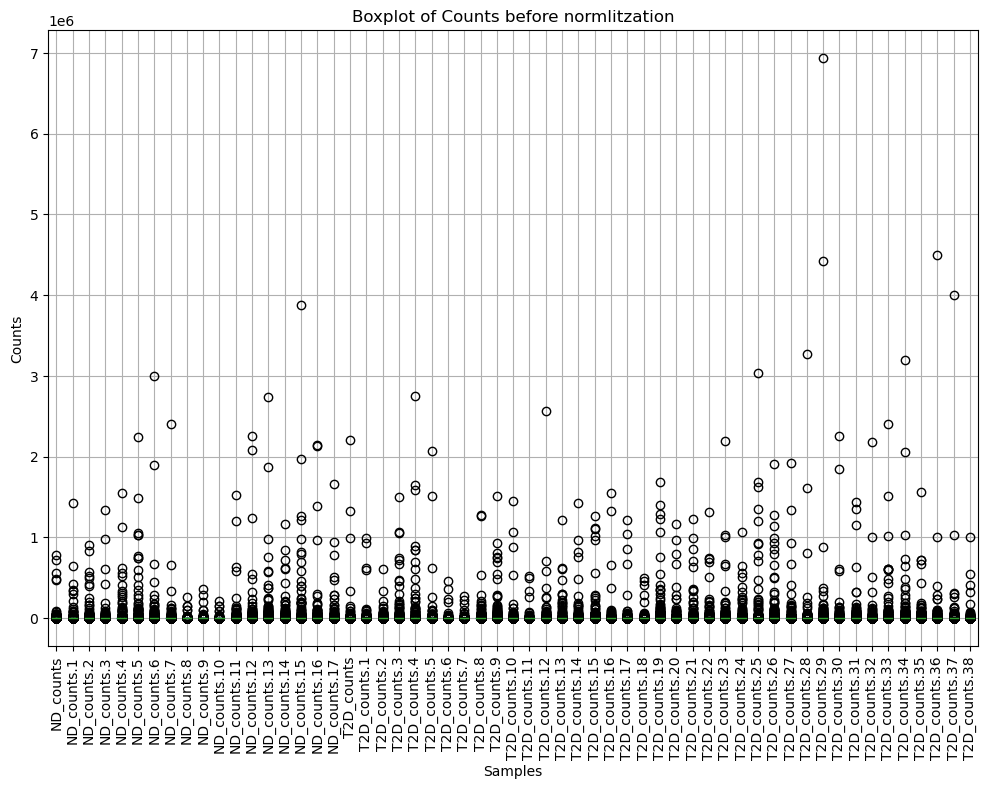

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

counts1.boxplot()
plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()


#### TRANSFORMAR LES DADES PER VISUALITZAR-HO MILLOR: Log1P

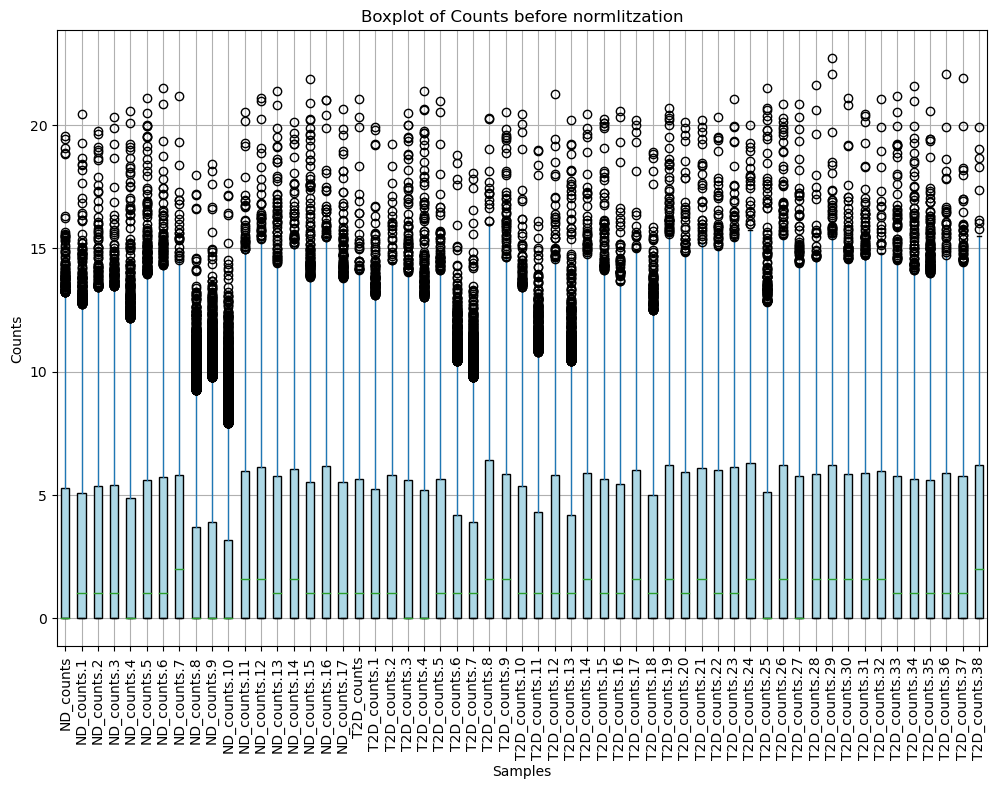

In [10]:
import numpy as np
counts1_t= np.log2(counts1 +1)
counts1_t

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

counts1_t.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))
plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')

plt.xticks(rotation=90)
plt.show()


#### Reduïr la densitat de mostres per veure millor: 20 mostres

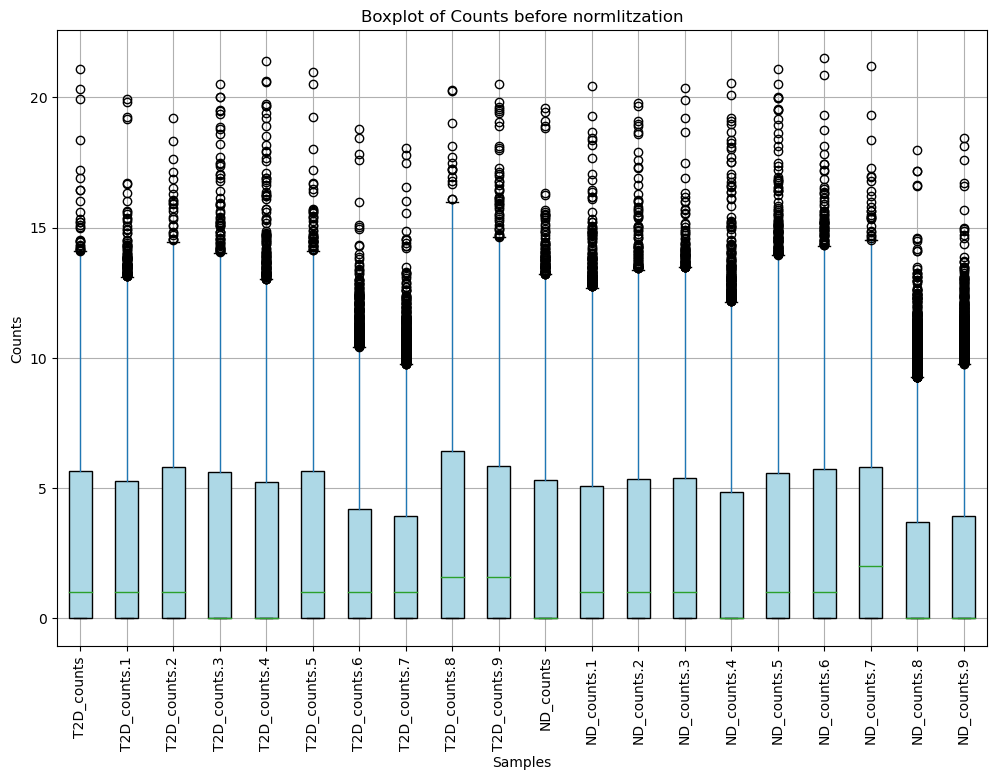

In [11]:
columns_T2D = [col for col in counts1_t.columns if col.startswith('T2D')]
columns_ND = [col for col in counts1_t.columns if col.startswith('ND')]

counts1_t_20 = counts1_t[columns_T2D[:10] + columns_ND[:10]]

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

bp=counts1_t_20.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))

plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

## 2. Boxplot després normalitzar:

#### 2.1 Construcció dataframe normalitzat:

In [12]:
normalized_data=dds.layers['normed_counts']
normalized_data

array([[185.078119  ,   0.        , 686.1672816 , ...,   0.        ,
          0.        ,   1.96891616],
       [226.23232466,   0.        , 679.83956147, ...,   5.71293749,
          0.        ,   0.        ],
       [385.25980192,   0.        , 564.97282906, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [830.58181253,   0.        , 560.12100121, ...,   0.        ,
          0.        ,   7.51280031],
       [677.76949559,   0.        , 594.67756223, ...,   1.6292536 ,
          0.        ,   8.14626798],
       [201.52933562,   1.56832168, 465.00737752, ...,   9.40993007,
          0.        ,  10.19409091]])

In [13]:
normalized_df = pd.DataFrame(dds.layers['normed_counts'].T, index=dds.var_names, columns=dds.obs_names)
normalized_df

Sample,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T2D_counts.29,T2D_counts.30,T2D_counts.31,T2D_counts.32,T2D_counts.33,T2D_counts.34,T2D_counts.35,T2D_counts.36,T2D_counts.37,T2D_counts.38
ENSG00000000003,185.078119,226.232325,385.259802,186.565171,565.628071,405.690746,369.111912,214.517217,145.225037,90.893444,...,480.030051,343.788789,500.734922,222.721293,820.494217,687.725582,462.931058,830.581813,677.769496,201.529336
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,29.695474,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.944658,5.384246,0.000000,0.000000,4.829534,0.000000,0.000000,0.000000,1.568322
ENSG00000000419,686.167282,679.839561,564.972829,595.439307,780.566738,1236.281079,693.462119,402.001776,425.773405,441.100539,...,721.580354,744.262238,787.446047,781.451182,652.556804,664.543821,1018.601617,560.121001,594.677562,465.007378
ENSG00000000457,228.394275,261.652537,157.248899,261.539959,265.845193,266.618729,291.984050,302.591359,231.039832,195.153572,...,325.478798,220.113164,266.520201,214.244012,243.749159,245.340306,269.021194,278.808367,260.680575,291.707832
ENSG00000000460,117.150511,97.119937,30.326573,88.051786,65.047228,26.892379,86.080203,91.562227,72.612519,90.893444,...,61.411094,44.169866,90.859159,61.652953,28.789271,46.363522,59.016046,56.763380,41.545967,49.402133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.131850,0.000000,0.000000,0.000000,...,0.511759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.834756,0.000000,0.000000
ENSG00000285486,0.984458,0.000000,0.000000,1.743600,0.000000,0.000000,0.000000,14.824361,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.814627,0.000000
ENSG00000285492,0.000000,5.712937,0.000000,4.358999,0.000000,3.073415,2.754567,8.720212,3.300569,0.000000,...,0.000000,2.208493,0.673031,0.770662,0.000000,1.931813,0.000000,0.000000,1.629254,9.409930
ENSG00000285498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300569,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


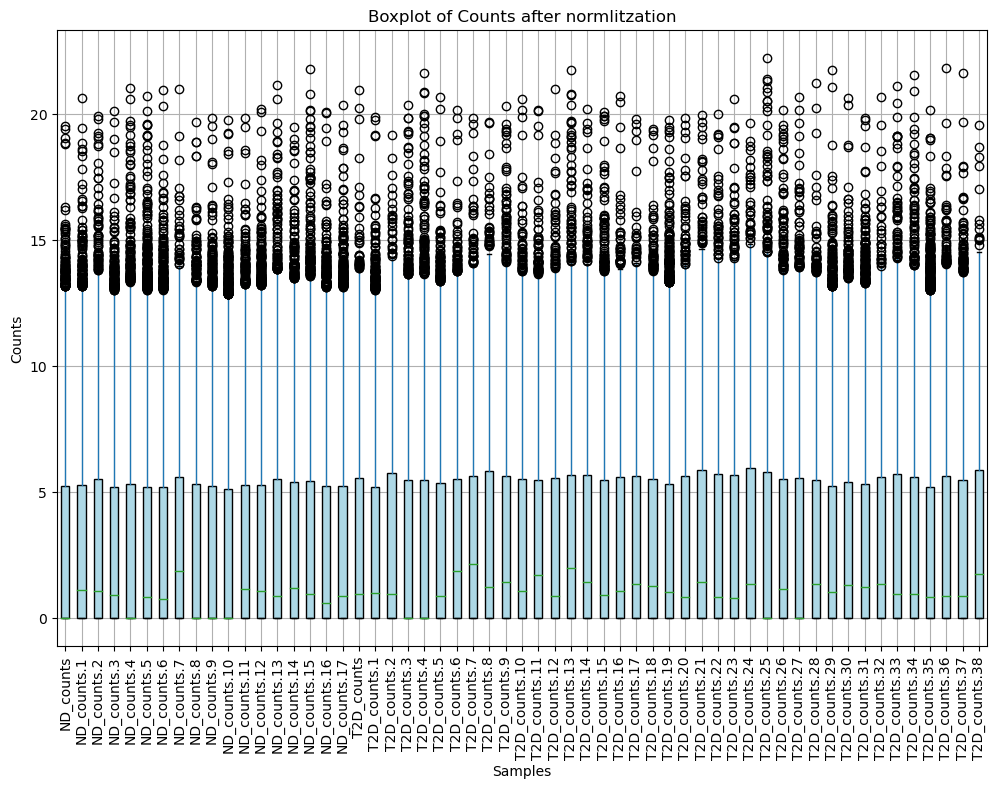

In [14]:
normalized_df_t= np.log2(normalized_df +1)
normalized_df_t

plt.figure(figsize=(12, 8)) 

normalized_df_t.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))
plt.title('Boxplot of Counts after normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')

plt.xticks(rotation=90)
plt.show()

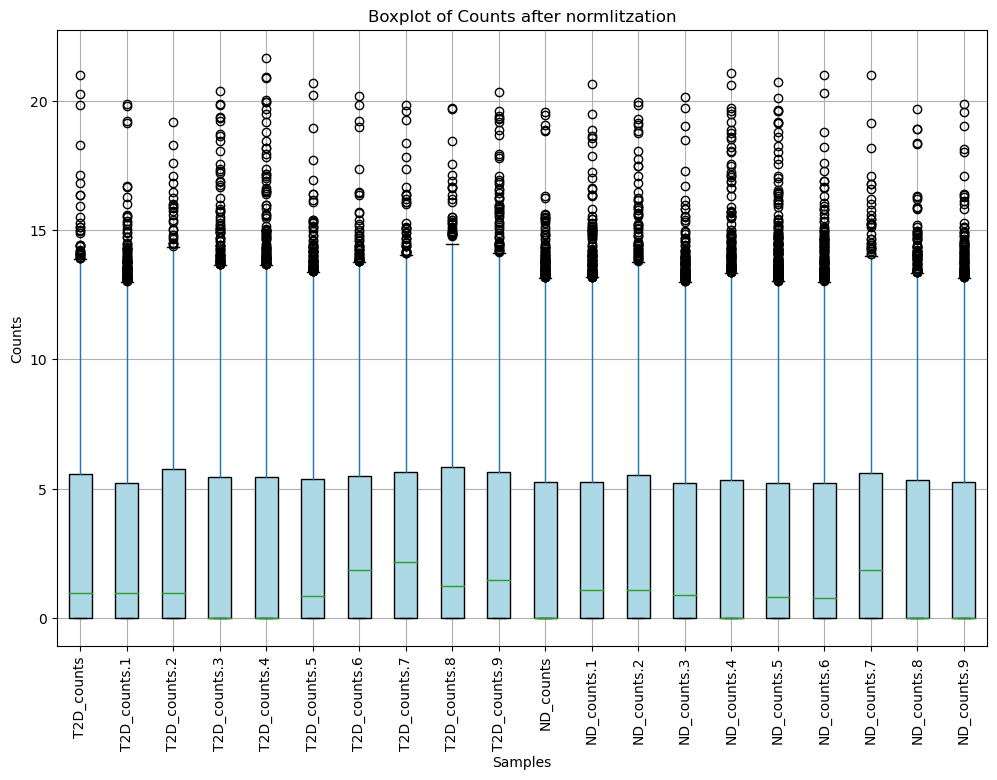

In [15]:
columns_T2D_n = [col for col in normalized_df_t.columns if col.startswith('T2D')]
columns_ND_n = [col for col in normalized_df_t.columns if col.startswith('ND')]

normalized_t_20 = normalized_df_t[columns_T2D_n[:10] + columns_ND_n[:10]]

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

bp=normalized_t_20.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))

plt.title('Boxplot of Counts after normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

## DEG study:

In [16]:
from pydeseq2.default_inference import DefaultInference

#Creació de stat_res: objecte que tindrà només els resultats estadístics: log2foldchange...
inference = DefaultInference(n_cpus=8)
stat_res=DeseqStats(dds, inference=inference, contrast=('condition','T2D','ND'))
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition T2D vs ND
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003  375.148223        0.475054  0.183527  2.588465  0.009640   
ENSG00000000005    2.101486       -0.174669  1.108083 -0.157632  0.874747   
ENSG00000000419  627.071293       -0.138187  0.111289 -1.241687  0.214352   
ENSG00000000457  239.486469       -0.134296  0.104067 -1.290477  0.196885   
ENSG00000000460   52.847949       -0.436018  0.212865 -2.048329  0.040528   
...                     ...             ...       ...       ...       ...   
ENSG00000285483    0.460836       -0.419037  1.406564 -0.297915  0.765768   
ENSG00000285486    0.913306        1.308992  1.516289  0.863286  0.387980   
ENSG00000285492    2.847750        0.870246  0.780969  1.114316  0.265144   
ENSG00000285498    0.132571       -0.125893  3.251859 -0.038714  0.969118   
ENSG00000285509    5.243022       -0.345138  0.654422 -0.527394  0.597920   

                 

... done in 3.39 seconds.



In [17]:
from sanbomics.tools import id_map

#Guardar els valors (resultats) de stat_res com a nom de res:
res =stat_res.results_df

#Transformar els 'ensmbl' a symbol, i afegir columna a res amb el symbol:
mapper = id_map(species='human')
res['Symbol'] = res.index.map(mapper.mapper)

#Filtrar els gens amb molt poca expressió, 
#per fer-ho ens bassem en Basemean (promitg dels recomptes de lectures normalitzades d'un gen), basemean >=10:
res=res[res.baseMean>= 10]
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.148223,0.475054,0.183527,2.588465,0.009640,0.070969,TSPAN6
ENSG00000000419,627.071293,-0.138187,0.111289,-1.241687,0.214352,0.436885,DPM1
ENSG00000000457,239.486469,-0.134296,0.104067,-1.290477,0.196885,0.414821,SCYL3
ENSG00000000460,52.847949,-0.436018,0.212865,-2.048329,0.040528,0.162894,C1orf112
ENSG00000000938,16.922048,1.126515,0.478841,2.352588,0.018643,0.103901,FGR
...,...,...,...,...,...,...,...
ENSG00000285399,16.433371,0.274723,0.260402,1.054996,0.291427,0.523200,NaN
ENSG00000285410,163.845955,0.253172,0.130227,1.944085,0.051885,0.188804,GABPB1-IT1
ENSG00000285417,11.783023,0.740980,0.331409,2.235847,0.025362,0.123790,NaN
ENSG00000285437,16.092147,0.157802,0.290170,0.543826,0.586561,0.768621,POLR2J3


Veure els gens més significatius: (p-valor adj>0.05)

In [18]:
#Dels resultats identifiquem filtrant els gens diferencialment expressats:
sigs =res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 1)] #dades filtrades per significancia
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000971,320.725747,1.085346,0.384478,2.822908,4.759019e-03,4.593130e-02,CFH
ENSG00000002726,16.019013,1.245481,0.380529,3.273028,1.064020e-03,1.900285e-02,AOC1
ENSG00000010282,231.603742,-1.505341,0.260093,-5.787708,7.135310e-09,4.431028e-06,HHATL
ENSG00000010327,42.887523,1.242546,0.331242,3.751167,1.760136e-04,6.121052e-03,STAB1
ENSG00000010932,38.127652,1.355664,0.356428,3.803476,1.426796e-04,5.337592e-03,FMO1
...,...,...,...,...,...,...,...
ENSG00000280229,65.323826,1.031115,0.285298,3.614170,3.013119e-04,8.556148e-03,NaN
ENSG00000281831,34.048016,1.367780,0.380612,3.593630,3.261030e-04,8.983331e-03,AL645929.2
ENSG00000282100,14.190418,1.061065,0.341414,3.107853,1.884516e-03,2.680324e-02,HSP90AB4P
ENSG00000282961,36.719116,1.110832,0.290260,3.827031,1.296979e-04,4.971755e-03,PRNCR1


### PCA:

#### PCA amb valors normalitzats:

In [19]:
normalized=normalized_df.T
normalized
import pandas as pd

# Añadir la columna "conditions" basada en el índice
normalized['conditions'] = normalized.index.map(lambda x: 'T2D' if x.startswith('T2D') else 'ND' if x.startswith('ND') else 'Other')
normalized.set_index('conditions', inplace=True)
normalized.index.name = None
normalized

# Añadir la columna "patologia" basada en el índice
normalized['patologia'] = normalized.index.map(lambda x: 'T2D' if x.startswith('T2D') else 'ND' if x.startswith('ND') else 'Other')

# Mover el índice a una nueva columna
normalized.reset_index(inplace=True)

# Cambiar el nombre de la nueva columna a 'patologia' y eliminar la columna anterior
normalized = normalized.rename(columns={'index': 'patologia'}).iloc[:, :-1]

normalized

,patologia,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000285462,ENSG00000285467,ENSG00000285471,ENSG00000285473,ENSG00000285476,ENSG00000285483,ENSG00000285486,ENSG00000285492,ENSG00000285498,ENSG00000285509
0,ND,185.078119,0.000000,686.167282,228.394275,117.150511,17.720245,28.549284,602.488345,313.057669,...,0.000000,4.922290,0.000000,0.000000,67.927608,0.000000,0.984458,0.000000,0.000000,1.968916
1,ND,226.232325,0.000000,679.839561,261.652537,97.119937,1.142587,138.253087,534.730949,258.224775,...,0.000000,3.427762,0.000000,0.000000,34.277625,0.000000,0.000000,5.712937,0.000000,0.000000
2,ND,385.259802,0.000000,564.972829,157.248899,30.326573,29.203367,530.153430,624.502769,356.056435,...,0.000000,6.739239,0.000000,0.000000,14.601683,0.000000,0.000000,0.000000,0.000000,0.000000
3,ND,186.565171,0.000000,595.439307,261.539959,88.051786,6.974399,20.051397,507.387520,350.463545,...,0.000000,8.717999,0.000000,0.000000,55.795191,0.000000,1.743600,4.358999,0.000000,6.974399
4,ND,565.628071,29.695474,780.566738,265.845193,65.047228,0.000000,59.390947,541.588878,277.157755,...,0.000000,2.828140,0.000000,0.000000,26.867333,0.000000,0.000000,0.000000,0.000000,24.039193
5,ND,405.690746,0.000000,1236.281079,266.618729,26.892379,3.073415,166.732750,589.327276,271.997204,...,0.000000,1.536707,0.000000,0.000000,33.807562,0.000000,0.000000,3.073415,0.000000,8.451891
6,ND,369.111912,0.000000,693.462119,291.984050,86.080203,6.886416,207.281130,392.525728,234.826795,...,0.000000,5.509133,0.000000,0.000000,28.234307,4.131850,0.000000,2.754567,0.000000,3.443208
7,ND,214.517217,0.000000,402.001776,302.591359,91.562227,0.872021,2.616064,375.841140,150.859669,...,0.872021,4.360106,0.000000,0.872021,97.666375,0.000000,14.824361,8.720212,0.000000,0.000000
8,ND,145.225037,0.000000,425.773405,231.039832,72.612519,3.300569,6.601138,491.784785,204.635280,...,0.000000,9.901707,0.000000,0.000000,26.404552,0.000000,0.000000,3.300569,3.300569,0.000000
9,ND,90.893444,0.000000,441.100539,195.153572,90.893444,5.346673,18.713356,403.673827,283.373680,...,0.000000,2.673337,0.000000,0.000000,50.793395,0.000000,0.000000,0.000000,0.000000,5.346673


Varianza explicada por el Componente Principal 1: 52.32%
Varianza explicada por el Componente Principal 2: 31.00%


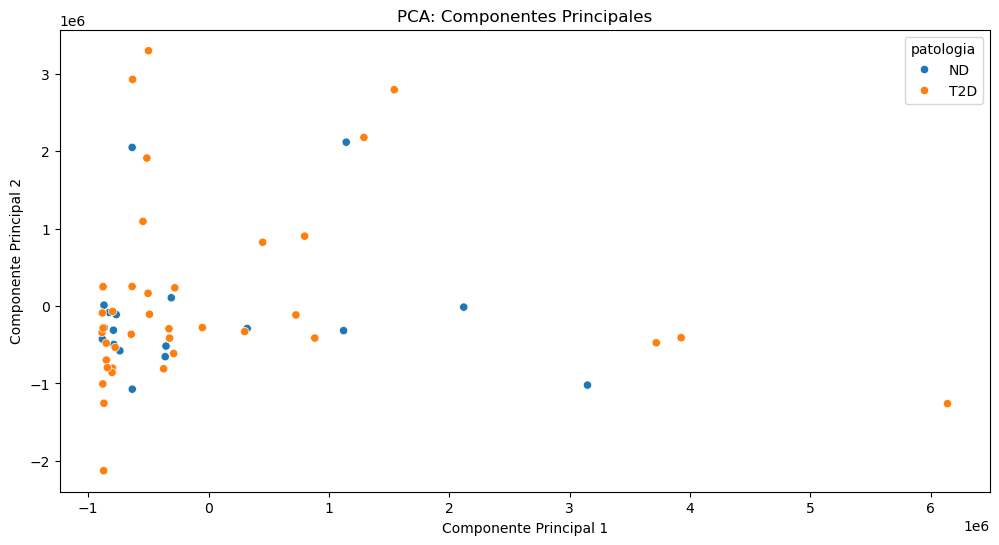

In [20]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = normalized.iloc[:, 1:49682].values  
y = normalized.loc[:, ["patologia"]].values

pca = PCA(n_components=2)
components = pca.fit_transform(x)

# Crear DataFrame para los componentes principales
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])

# Concatenar con la columna y
pcaDF = pd.concat([pca_df, pd.DataFrame(y, columns=["patologia"])], axis=1)


# Graficar los resultados
plt.figure(figsize=(12, 6))
scatter=sns.scatterplot(data=pcaDF, x='PC1', y='PC2', hue="patologia")

explained_variance = pca.explained_variance_ratio_

# Imprimir la varianza explicada de cada componente
for i, var in enumerate(explained_variance):
    print(f"Varianza explicada por el Componente Principal {i+1}: {var:.2%}")


plt.title('PCA: Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### PCA sense valors normalitzat: 

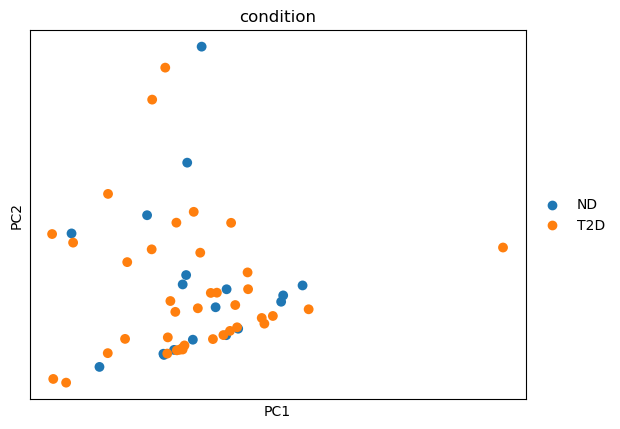

In [21]:
import scanpy as sc

#PCA
sc.tl.pca(dds)
sc.pl.pca(dds, color='condition',size=200)

# ClusterMap:

In [22]:
import numpy as np
import seaborn as sns

dds.layers['normed_counts']

array([[185.078119  ,   0.        , 686.1672816 , ...,   0.        ,
          0.        ,   1.96891616],
       [226.23232466,   0.        , 679.83956147, ...,   5.71293749,
          0.        ,   0.        ],
       [385.25980192,   0.        , 564.97282906, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [830.58181253,   0.        , 560.12100121, ...,   0.        ,
          0.        ,   7.51280031],
       [677.76949559,   0.        , 594.67756223, ...,   1.6292536 ,
          0.        ,   8.14626798],
       [201.52933562,   1.56832168, 465.00737752, ...,   9.40993007,
          0.        ,  10.19409091]])

In [23]:
dds.layers['log2']=np.log2(dds.layers['normed_counts'] +1)
dds

AnnData object with n_obs × n_vars = 57 × 49681
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log2'

## Clustermap de Valors normalitzats transformats a log2:

In [24]:
grapher=pd.DataFrame(dds.layers['log2'].T,
                    index=dds.var_names, columns=dds.obs_names) #dataframe con los valores filtrados de mayor expression i con los valores transformados a log +1.
grapher

Sample,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T2D_counts.29,T2D_counts.30,T2D_counts.31,T2D_counts.32,T2D_counts.33,T2D_counts.34,T2D_counts.35,T2D_counts.36,T2D_counts.37,T2D_counts.38
ENSG00000000003,7.539765,7.828024,8.593428,7.551248,9.146258,8.667788,8.531818,7.751659,7.192047,6.521890,...,8.909983,8.429569,8.970782,7.805559,9.682107,9.427785,8.857767,9.699714,9.406778,7.661987
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,4.939954,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.979900,2.674516,0.000000,0.000000,2.543380,0.000000,0.000000,0.000000,1.360826
ENSG00000000419,9.424518,9.411171,9.144589,9.220232,9.610225,10.272958,9.439752,8.654642,8.737326,8.788231,...,9.497014,9.541604,9.622868,9.611857,9.352169,9.378390,9.993790,9.132168,9.218388,8.864209
ENSG00000000457,7.841686,8.037012,7.306052,8.036393,8.059859,8.064035,8.194678,8.245987,7.858229,7.615840,...,8.350845,7.788641,8.063504,7.749829,7.935160,7.944509,8.076929,8.128295,8.031663,8.193318
ENSG00000000460,6.884482,6.616474,4.969315,6.476573,6.045426,4.801799,6.444273,6.532352,6.201879,6.521890,...,5.963731,5.497289,6.521352,5.969311,4.896721,5.565704,5.907276,5.852083,5.410950,5.655413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.359479,0.000000,0.000000,0.000000,...,0.596228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875588,0.000000,0.000000
ENSG00000285486,0.988745,0.000000,0.000000,1.456070,0.000000,0.000000,0.000000,3.984075,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.859673,0.000000
ENSG00000285492,0.000000,2.746944,0.000000,2.421964,0.000000,2.026239,1.908646,3.280988,2.104528,0.000000,...,0.000000,1.681896,0.742464,0.824289,0.000000,1.551793,0.000000,0.000000,1.394653,3.379888
ENSG00000285498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.104528,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1400x1000 with 0 Axes>

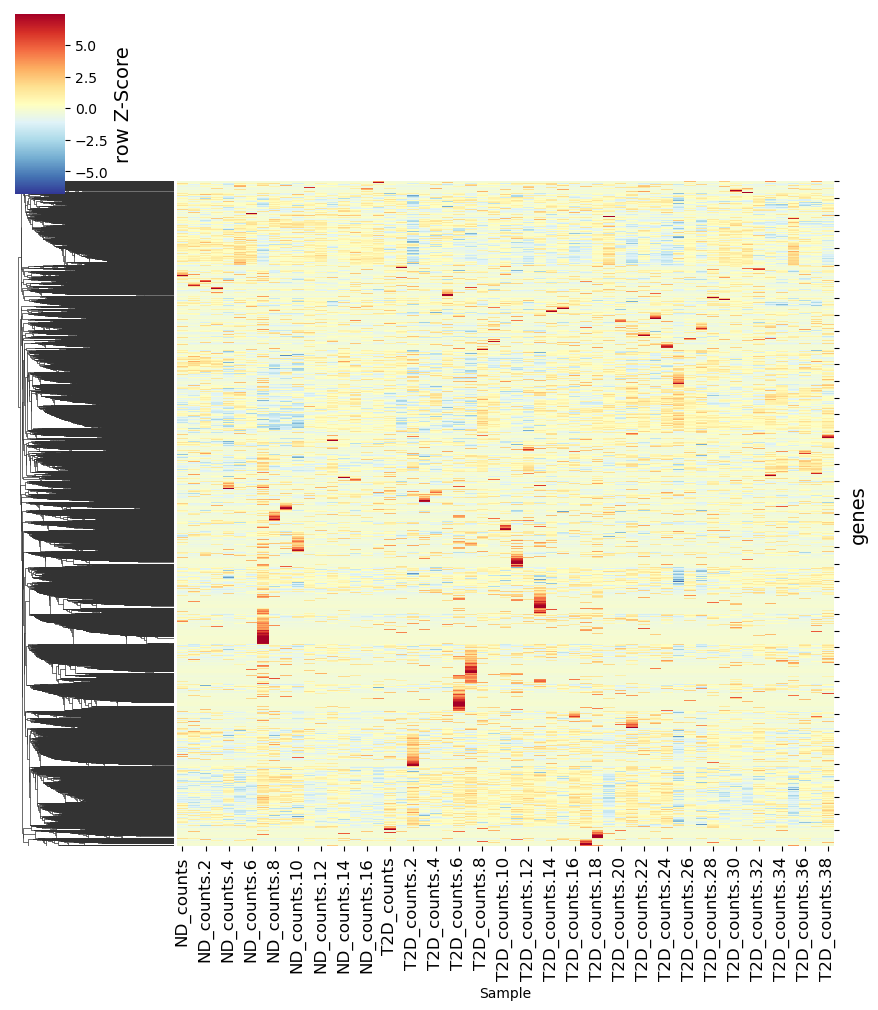

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorganizar las muestras
nd_samples = [col for col in grapher.columns if "ND" in col]
IGT_samples = [col for col in grapher.columns if "T2D" in col]

ordered_columns = nd_samples + IGT_samples

grapher_ordered = grapher[ordered_columns]

# Crear el clustermap utilizando seaborn
plt.figure(figsize=(14, 10))
clustermap = sns.clustermap(grapher_ordered, z_score=0, cmap="RdYlBu_r", col_cluster=False, cbar_kws={'label':'row Z-Score'})

clustermap.ax_heatmap.set_yticklabels([])
clustermap.ax_heatmap.set_ylabel('genes', fontsize=14)
clustermap.cax.yaxis.label.set_size(14)
# Hacer que las etiquetas del eje x sean más grandes
plt.setp(clustermap.ax_heatmap.xaxis.get_majorticklabels(), fontsize=12)

plt.show()



### Clustermap dels gens més significatius:

In [15]:
dds_sigs=dds[:, sigs.index]
#dds_sigs.obs

In [27]:
grapher1=pd.DataFrame(dds_sigs.layers['log2'].T,
                    index=dds_sigs.var_names, columns=dds_sigs.obs_names) #dataframe con los valores filtrados de mayor expression i con los valores transformados a log +1.
grapher1

Sample,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T2D_counts.29,T2D_counts.30,T2D_counts.31,T2D_counts.32,T2D_counts.33,T2D_counts.34,T2D_counts.35,T2D_counts.36,T2D_counts.37,T2D_counts.38
ENSG00000000971,4.885051,7.121566,9.052985,4.395844,5.916260,7.390021,7.702388,1.854420,2.926215,4.301102,...,9.376671,8.310843,9.274996,8.383384,9.597069,7.776729,8.591537,9.390833,8.184911,9.422814
ENSG00000002726,2.980246,3.342085,2.952192,0.000000,4.378302,0.000000,3.315036,3.902299,4.591200,1.877091,...,6.271502,4.383804,3.713097,3.817751,0.970590,5.410544,3.115103,2.940739,2.744675,4.060326
ENSG00000010282,9.241881,7.400541,8.785606,8.060150,8.627627,9.180751,8.311862,7.170040,9.757805,9.927918,...,6.212989,7.793436,6.764008,7.465247,4.466766,5.199223,7.721134,6.297050,6.794086,7.405946
ENSG00000010327,3.679592,4.643529,4.481617,2.639417,6.643639,2.837303,3.743682,2.995696,3.446482,4.301102,...,4.424275,4.781460,4.358811,6.055418,6.091170,5.160785,1.722172,4.917262,3.429686,5.883325
ENSG00000010932,4.300468,2.146578,6.394330,3.404603,2.734716,3.732666,4.073714,3.624835,0.000000,2.666001,...,5.390280,5.473582,5.439654,4.496880,6.480380,5.038916,4.439220,6.250355,5.354618,6.353474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000280229,5.107335,5.580329,5.020137,4.061119,5.486591,4.162192,5.306114,5.587639,5.343650,5.965478,...,4.075920,6.207117,6.971667,5.538198,4.849480,4.122707,7.705327,5.205333,5.993816,7.119069
ENSG00000281831,4.148591,4.885803,4.245747,3.404603,0.000000,2.275534,1.249314,2.639725,4.591200,4.647316,...,5.425065,4.040844,1.230241,5.759573,4.528057,6.904563,5.297269,4.994849,5.731621,6.498160
ENSG00000282100,3.438902,4.269138,2.725966,3.518736,2.734716,3.732666,2.979370,1.456303,3.828050,2.666001,...,3.554213,1.305871,3.285314,4.036788,4.586850,4.809692,0.820847,3.224589,4.112078,5.609808
ENSG00000282961,3.786383,5.580329,3.473639,5.266314,5.004930,3.813731,4.869590,3.404935,5.087704,3.173129,...,3.615734,4.278290,5.169829,5.951455,4.750089,4.040411,4.629922,4.835264,5.465165,5.050963


C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1400x1000 with 0 Axes>

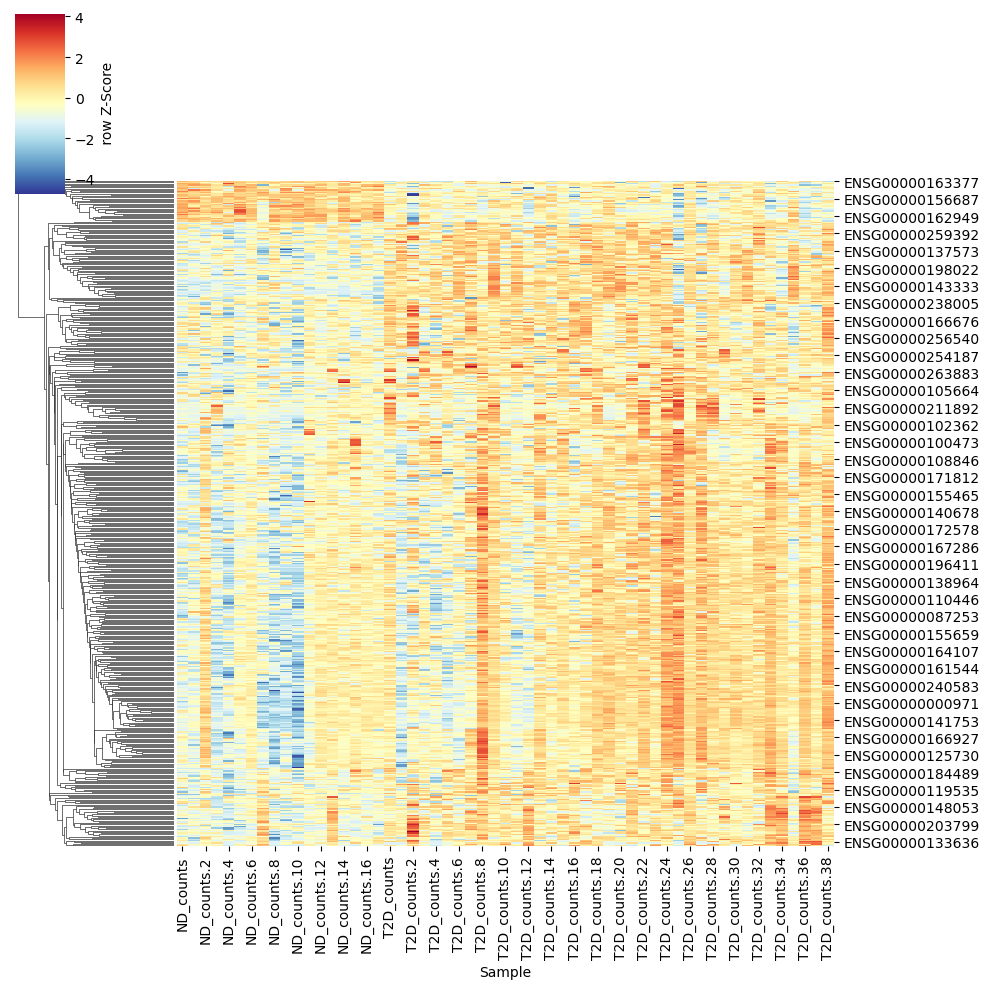

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorganizar las muestras
nd_samples1 = [col for col in grapher1.columns if "ND" in col]
t2d_samples1 = [col for col in grapher1.columns if "T2D" in col]

ordered_columns1 = nd_samples1 + t2d_samples1

grapher_ordered1 = grapher1[ordered_columns1]

# Crear el clustermap utilizando seaborn
plt.figure(figsize=(14, 10))
sns.clustermap(grapher_ordered1, z_score=0, cmap="RdYlBu_r", col_cluster=False, cbar_kws={'label':' row Z-Score'})

plt.show()

### VolcanoPlot:

Amb la implementació del Volcano Plot i establint límits del log2FoldChange i p-valor ajustat visualitzarem els gens diferencialment regulats.

In [26]:
from sanbomics.plots import volcano
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.148223,0.475054,0.183527,2.588465,0.009640,0.070969,TSPAN6
ENSG00000000419,627.071293,-0.138187,0.111289,-1.241687,0.214352,0.436885,DPM1
ENSG00000000457,239.486469,-0.134296,0.104067,-1.290477,0.196885,0.414821,SCYL3
ENSG00000000460,52.847949,-0.436018,0.212865,-2.048329,0.040528,0.162894,C1orf112
ENSG00000000938,16.922048,1.126515,0.478841,2.352588,0.018643,0.103901,FGR
...,...,...,...,...,...,...,...
ENSG00000285399,16.433371,0.274723,0.260402,1.054996,0.291427,0.523200,NaN
ENSG00000285410,163.845955,0.253172,0.130227,1.944085,0.051885,0.188804,GABPB1-IT1
ENSG00000285417,11.783023,0.740980,0.331409,2.235847,0.025362,0.123790,NaN
ENSG00000285437,16.092147,0.157802,0.290170,0.543826,0.586561,0.768621,POLR2J3


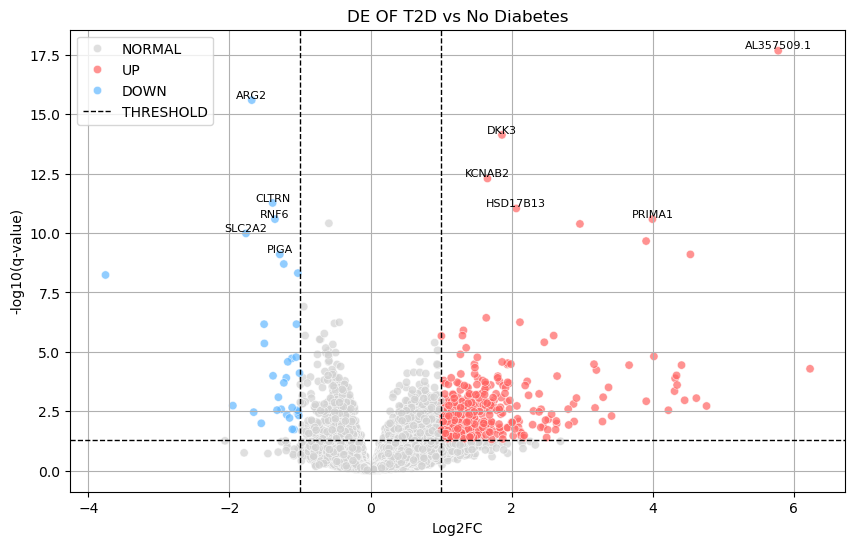

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Datos
t_results = pd.DataFrame({
    'gen': res['Symbol'],
    'p_value': res['pvalue'],
    'q_value': res['padj'],
    'Log2FC': res['log2FoldChange']
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['Log2FC'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['Log2FC'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_sign = t_results[t_results['sign'] != 'NORMAL']

# Crear el Volcano Plot
plt.figure(figsize=(10, 6))
colors = {"NORMAL": "#D2D2D2", "UP": "#FF6462", "DOWN": "#62B8FF"}

sns.scatterplot(x=t_results['Log2FC'], y=-np.log10(t_results['q_value']), hue=t_results['sign'], palette=colors, alpha=0.7)
plt.axhline(-np.log10(0.05), color='k', linestyle='--', linewidth=1, label='THRESHOLD')
plt.axvline(1, color='k', linestyle='--', linewidth=1)
plt.axvline(-1, color='k', linestyle='--', linewidth=1)

# Etiquetas y título
plt.xlabel('Log2FC')
plt.ylabel('-log10(q-value)')
plt.title('DE OF T2D vs No Diabetes')
plt.legend()
plt.grid(True)

# Filtrar los genes UP más significativos
up_genes = t_results[t_results['sign'] == 'UP'].nsmallest(5, 'q_value')

for idx, row in up_genes.iterrows():
    plt.text(row['Log2FC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

# Filtrar los genes DOWN más significativos
down_genes = t_results[t_results['sign'] == 'DOWN'].nsmallest(5, 'q_value')

for idx, row in down_genes.iterrows():
    plt.text(row['Log2FC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

plt.show()



### Gens diferencialment expressats:

In [30]:
print("Genes diferencialmente expresados con su q-value y dirección:")
de=t_sign[['gen', 'q_value', 'Log2FC','sign']]
de=de.sort_values(by='q_value', ascending=False)
de

Genes diferencialmente expresados con su q-value y dirección:


,gen,q_value,Log2FC,sign
ENSG00000155761,SPAG17,4.969609e-02,1.144610,UP
ENSG00000166927,MS4A7,4.857747e-02,1.002886,UP
ENSG00000248174,LINC02268,4.838055e-02,1.336931,UP
ENSG00000198022,SAGE2P,4.811949e-02,1.717254,UP
ENSG00000240583,AQP1,4.776684e-02,1.053087,UP
...,...,...,...,...
ENSG00000147003,CLTRN,5.475555e-12,-1.387700,DOWN
ENSG00000069424,KCNAB2,5.104060e-13,1.658287,UP
ENSG00000050165,DKK3,7.509498e-15,1.863947,UP
ENSG00000081181,ARG2,2.585767e-16,-1.683735,DOWN


In [31]:
de.to_csv("C:/Users/NOE/Desktop/TFG_Study/Transcriptòmic_study/Gens Diferencialment Expressats/DiferentialExpresset_gens_T2D.csv", index=False)

### Extracció dels gens down-regulated:

In [19]:
downregulated_genes = t_results[t_results['sign'] == 'DOWN']
downregulated_genes_df = pd.DataFrame(downregulated_genes)

genes_downregulated = downregulated_genes_df['gen']
genes_downregulated = genes_downregulated.dropna()
genes_downregulated



ENSG00000010282         HHATL
ENSG00000022355        GABRA1
ENSG00000065320          NTN1
ENSG00000081181          ARG2
ENSG00000091128         LAMB4
ENSG00000111644         ACRBP
ENSG00000116329         OPRD1
ENSG00000121351          IAPP
ENSG00000123836        PFKFB2
ENSG00000127870          RNF6
ENSG00000134042           MRO
ENSG00000134121          CHL1
ENSG00000136943          CTSV
ENSG00000145888         GLRA1
ENSG00000147003         CLTRN
ENSG00000151834        GABRA2
ENSG00000156687         UNC5D
ENSG00000162949        CAPN13
ENSG00000163377         TAFA4
ENSG00000163581        SLC2A2
ENSG00000165061         ZMAT4
ENSG00000165195          PIGA
ENSG00000167034        NKX3-1
ENSG00000170044         ZPLD1
ENSG00000171004        HS6ST2
ENSG00000171227        TMEM37
ENSG00000172575       RASGRP1
ENSG00000176928         GCNT4
ENSG00000187068       C3orf70
ENSG00000225833    AC097625.1
ENSG00000226454    AL033380.1
ENSG00000255829    AC092490.2
Name: gen, dtype: object

In [37]:
genes_downregulated.to_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/Genes downregulated/T2D_down.txt', index=False, header=False)